# <center>Deep Learning and Text Analytics II</center>

References:
- General introduction
     - https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/
     - http://neuralnetworksanddeeplearning.com
     - http://ufldl.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/
- Word vector:
     - https://code.google.com/archive/p/word2vec/
- Keras tutorial
     - https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- CNN
     - http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

## 1. Agenda
- Introduction to neural networks
- Word/Document Vectors (vector representation of words/phrases/paragraphs)
- Convolutional neural network (CNN)
- Application of CNN in text classification

## 4. Word2Vector (a.k.a word embedding) and Doc2Vector

### 4.1. Word2Vector
 - Vector representation of words (i.e. word vectors) learned using neural network
   - e.g. "apple" : [0.35, -0.2, 0.4, ...], 'mongo':  [0.32, -0.18, 0.5, ...]
   - Interesting properties of word vectors:
    * **Words with similar semantics have close word vectors**
    * **Composition**: e.g. vector("woman")+vector("king")-vector('man') $\approx$ vector("queen")
 - Models:
   - **CBOW** (Continuous Bag of Words): Predict a target word based on context
     - e.g. the fox jumped over the lazy dog
     - Assuming symmetric context with window size 3, this sentence can create training samples: 
       - ([-, fox], the) 
       - ([the, jumped], fox) 
       - ([fox, over], jumped)
       - ([jumped, the], over) 
       - ...
       
       <img src="cbow.png" width="30%">
       source: https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
   - **Skip Gram**: predict context based on target words
   
        <img src="skip_gram.png" width="30%">
        source: https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
   - Nagtive Sampling: 
       - When training a neural network, for each sample,  all weights are adjusted slightly so that it predicts that training sample more accurately. 
       - CBOW or skip gram models have tremendous number of weights, all of which would be updated slightly by every one of billions of training samples!
       - Negative sampling addresses this by having **each training sample only modify a small percentage of the weights, rather than all of them**. 
       - e.g. when training with sample ([fox, over], jumped), update output weights connected to "jumped" along with a small number of other "negative words" sampled randomly
       - For details, check http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/
   
 

In [1]:
# set up interactive shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Exercise 4.1.1 Train your word vector

import pandas as pd
import nltk,string

# Load data
data=pd.read_csv('amazon_review_large.csv', header=None)
data.columns=['label','text']
data.head()

# tokenize each document into a list of unigrams
# strip punctuations and leading/trailing spaces from unigrams
# only unigrams with 2 or more characters are taken
sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in data["text"]]
print(sentences[0:2])

,label,text
0,2,This is a little longer and more detailed than...
1,1,Only Michelle Branch save this album!!!!All gu...
2,2,"A surprisingly good book, given its inherently..."
3,2,"This is a wonderful, quiet and relaxing CD tha..."
4,1,The lights that I received are absolutely not ...


[['this', 'is', 'little', 'longer', 'and', 'more', 'detailed', 'than', 'the', 'first', 'two', 'books', 'in', 'the', 'series', 'however', 'have', 'enjoyed', 'each', 'new', 'aspect', 'of', 'the', 'exciting', 'fantasy', 'universe'], ['only', 'michelle', 'branch', 'save', 'this', 'album', 'all', 'guys', 'play', 'along', 'with', 'unenthusiastic', 'beat', 'even', 'karl']]


In [3]:
# Train your own word vectors using gensim

# gensim.models is the package for word2vec
# check https://radimrehurek.com/gensim/models/word2vec.html
# for detailed description

from gensim.models import word2vec
import logging
import pandas as pd

# print out tracking information
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)

# min_count: words with total frequency lower than this are ignored
# size: the dimension of word vector
# window: context window, i.e. the maximum distance 
#         between the current and predicted word 
#         within a sentence (i.e. the length of ngrams)
# workers: # of parallel threads in training
# for other parameters, check https://radimrehurek.com/gensim/models/word2vec.html
wv_model = word2vec.Word2Vec(sentences, min_count=5, size=200, window=5, workers=4 )

2018-04-15 16:40:55,322 : INFO : collecting all words and their counts
2018-04-15 16:40:55,323 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-15 16:40:55,523 : INFO : PROGRESS: at sentence #10000, processed 712002 words, keeping 37008 word types
2018-04-15 16:40:55,733 : INFO : collected 55313 word types from a corpus of 1424320 raw words and 20000 sentences
2018-04-15 16:40:55,735 : INFO : Loading a fresh vocabulary
2018-04-15 16:40:55,900 : INFO : min_count=5 retains 12134 unique words (21% of original 55313, drops 43179)
2018-04-15 16:40:55,901 : INFO : min_count=5 leaves 1361936 word corpus (95% of original 1424320, drops 62384)
2018-04-15 16:40:55,955 : INFO : deleting the raw counts dictionary of 55313 items
2018-04-15 16:40:55,958 : INFO : sample=0.001 downsamples 57 most-common words
2018-04-15 16:40:55,961 : INFO : downsampling leaves estimated 1015542 word corpus (74.6% of prior 1361936)
2018-04-15 16:40:55,963 : INFO : estimated required m

In [4]:
# test word2vec model

print("Top 5 words similar to word 'sound'")
wv_model.wv.most_similar('sound', topn=5)

print("Top 5 words similar to word 'sound' but not relevant to 'film'")
wv_model.wv.most_similar(positive=['sound','music'], negative=['film'], topn=5)

print("Similarity between 'movie' and 'film':")
wv_model.wv.similarity('movie','film') 

print("Similarity between 'movie' and 'city':")
wv_model.wv.similarity('movie','city') 

print("Word does not match with others in the list of \
['sound', 'music', 'graphics', 'actor', 'book']:")
wv_model.wv.doesnt_match(["sound", "music", "graphics", "actor", "book"])

print("Word vector for 'movie':")
wv_model.wv['movie']

2018-04-15 16:41:22,384 : INFO : precomputing L2-norms of word weight vectors


Top 5 words similar to word 'sound'


[('vocals', 0.752764105796814),
 ('production', 0.7524744272232056),
 ('band', 0.7387509942054749),
 ('tunes', 0.7347677946090698),
 ('music', 0.7317479848861694)]

Top 5 words similar to word 'sound' but not relevant to 'film'


[('rock', 0.7866778373718262),
 ('pop', 0.7602622509002686),
 ('songs', 0.7421398758888245),
 ('lyrics', 0.735541820526123),
 ('dance', 0.7265161275863647)]

Similarity between 'movie' and 'film':


0.9271679194747968

Similarity between 'movie' and 'city':


0.05824728121002956

Word does not match with others in the list of ['sound', 'music', 'graphics', 'actor', 'book']:


'book'

Word vector for 'movie':


array([-0.69296825,  1.9410071 ,  1.1032392 ,  0.28273162,  0.42957693,
       -0.9365348 , -1.0965693 , -0.80102354, -0.6073362 , -0.6036657 ,
       -0.755955  , -0.64555955,  0.38533428,  1.26458   , -1.4919953 ,
        0.6493107 ,  0.68263006, -1.2019557 , -1.2168735 , -0.66030353,
       -0.0716041 , -0.18498282, -1.0847113 ,  1.4383963 ,  0.17555667,
       -0.9925629 , -0.2793453 , -0.25657752, -0.96071786,  0.3448194 ,
        0.09386399,  0.92940575,  0.97134227,  0.8171112 ,  1.8990242 ,
       -1.7758207 , -0.08644257,  1.7223121 ,  0.74421877, -0.40162137,
        0.0881858 ,  0.39953655,  1.6021348 , -0.02983055,  0.19915771,
        0.85322255,  0.6185111 ,  2.2444851 , -0.2344643 , -0.22815944,
        0.14900081,  0.86710435,  0.55936015,  0.0411598 , -0.52943635,
       -1.3750321 ,  0.28646645,  1.0315421 ,  0.82511675,  0.99012333,
        0.4037915 , -2.0691526 , -1.7561779 ,  1.7496054 , -0.20156628,
       -0.21941772, -0.20687418,  1.2774737 ,  0.7427888 , -0.45

### 4.2. Pretrained Word Vectors
- Google published pre-trained 300-dimensional vectors for 3 million words and phrases that were trained on Google News dataset (about 100 billion words)(https://code.google.com/archive/p/word2vec/)
- GloVe (Global Vectors for Word Representation): Pretained word vectors from different data sources provided by Standford https://nlp.stanford.edu/projects/glove/
- FastText by Facebook https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md

In [7]:
# Exercise 4.2.1: Use pretrained word vectors

# download the bin file for pretrained word vectors
# from above links, e.g. https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing
# Warning: the bin file is very big (over 2G)
# You need a powerful machine to load it

import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('/Users/xiadylan/Downloads/GoogleNews-vectors-negative300.bin', binary=True) 

#model.wv.most_similar(positive=['women','king'], negative='man')
model.wv.most_similar('communication',topn=20)

2018-04-15 17:44:58,810 : INFO : loading projection weights from /Users/xiadylan/Downloads/GoogleNews-vectors-negative300.bin
2018-04-15 17:46:13,643 : INFO : loaded (3000000, 300) matrix from /Users/xiadylan/Downloads/GoogleNews-vectors-negative300.bin
2018-04-15 17:46:13,657 : INFO : precomputing L2-norms of word weight vectors


[('communications', 0.7521636486053467),
 ('Mahir_Yassin_director', 0.6448125839233398),
 ('communcation', 0.6222150921821594),
 ('interpersonal_communication', 0.6083678007125854),
 ('intercommunication', 0.602850079536438),
 ('Communication', 0.5903989672660828),
 ('communicating', 0.5881104469299316),
 ('communicate', 0.5804769992828369),
 ('communi_cation', 0.5486894249916077),
 ('interaction', 0.5432522892951965),
 ('communciation', 0.5343629121780396),
 ('communicative', 0.5312253832817078),
 ('com_munication', 0.5273781418800354),
 ('comunication', 0.5263152718544006),
 ('REDWOOD_RAMBLERS_TOASTMASTERS', 0.5249114036560059),
 ('communicators', 0.5175506472587585),
 ('Excellent_interpersonal', 0.5057379603385925),
 ('coordination', 0.5033478736877441),
 ('connectivity', 0.49323806166648865),
 ('intercommunications', 0.49195945262908936)]

In [9]:
model.wv.most_similar("leadership",topn=50)

[('leader', 0.5659863948822021),
 ('Army_censured_Kensinger', 0.5293898582458496),
 ('Leadership', 0.5282222032546997),
 ('Targacept_leverages', 0.5193353891372681),
 ('leaderships', 0.5047478675842285),
 ('NNSA_Bodman', 0.503797173500061),
 ('leaders', 0.5006183981895447),
 ('chairmanship', 0.4903269410133362),
 ('organizational_structure', 0.48777055740356445),
 ('SIGAR_failing', 0.47965937852859497),
 ('followship', 0.47346433997154236),
 ('managerial_competence', 0.4674581289291382),
 ('Comrade_Mbeki', 0.4670478105545044),
 ('organizational', 0.4669966995716095),
 ('leadeship', 0.46600478887557983),
 ('Mr._Schimkaitis', 0.46522200107574463),
 ('SUSS_maintains', 0.4648105800151825),
 ('leaderhip', 0.4634861946105957),
 ('stewardship', 0.46299847960472107),
 ('competence', 0.4589086174964905),
 ('acumen', 0.4570310711860657),
 ('succeed', 0.4517122805118561),
 ('unquestionable_integrity', 0.4470038414001465),
 ('commitment', 0.4369075298309326),
 ('guru_Master_Shifu', 0.4359791278839

### 4.3. Sentence/Paragraph/Document Vectors
- So far we learned vector representation of words
- A lot of times, our samples are sentences, paragraphs, or documents
- How to create vector representations of sentences, paragraphs, or documents?
  - Weighted average of word vectors (however, word order is lost as "bag of words")
  - Concatenation of word vectors (large space)
  - ??
- Paragraph Vector: A distributed memory model (PV-DM)
   - Word vectors are shared across paragraphs
   - The paragraph vector is shared across all contexts generated from the same paragraph but not across paragraphs
   - **Both pragraph vectors and word vectors** are returned
   - Paragraph vectors can be used for document retrival or as features for classification or clustering
  <img src="doc2vec.png" width="50%">
   Source: Le Q. and Mikolov, T. Distributed Representations of Sentences and Documents https://arxiv.org/pdf/1405.4053v2.pdf

In [ ]:
# Exercise 4.3.1 Train your word vector

# We have tokenized sentences
# Label each sentence with a unique tag

from gensim.models.doc2vec import TaggedDocument

docs=[TaggedDocument(sentences[i], [str(i)]) for i in range(len(sentences)) ]
docs[0]

In [ ]:
from random import shuffle

# package for doc2vec
from gensim.models import doc2vec

# for more parameters, check
# https://radimrehurek.com/gensim/models/doc2vec.html

# initialize the model without documents
# distributed memory model is used (dm=1)
model = doc2vec.Doc2Vec(dm=1, min_count=5, window=5, size=200, workers=4)

# build the vocabulary using the documents
model.build_vocab(docs) 

# train the model in 20 epoches
# You may need to incease epoches
for epoch in range(30):
    # shuffle the documents in each epoch
    shuffle(docs)
    # in each epoch, all samples are used
    model.train(docs, total_examples=len(docs), epochs=1)

In [ ]:
# Inspect paragraph vectors and word vectors

# the pragraph vector of the first document
model.docvecs['0']

# the word vector of 'movie'
model.wv['movie']

In [ ]:
# Check word similarity

print("Top 5 words similar to word 'sound'")
model.wv.most_similar('sound', topn=5)

print("Top 5 words similar to word 'sound' but not relevant to 'film'")
model.wv.most_similar(positive=['sound','music'], negative=['film'], topn=5)

print("Similarity between 'movie' and 'film':")
model.wv.similarity('movie','film') 

print("Similarity between 'movie' and 'city':")
model.wv.similarity('movie','city') 

In [ ]:
# Inspect document similarity

model.docvecs.most_similar('0')

## 5. Convolutional Neural Networks (CNN)
References (**highly recommended**): 
- http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/
- https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/

- CNNs are widely used in Computer Vision
- CNNs were responsible for **major breakthroughs** in **Image Recognition** and are the core of most Computer Vision systems including automated photo tagging, self-driving cars
- Recently, CNNs have been applied in NLP and achieved good performance.
<img src='cnn.png' width='90%'>

### 5.1. Convolution
- Convolution is the technique to **extract distinguishing features** from feature spaces
- Example: feature detection from image pixels
  - Feature space: a matrix of pixels of 0 (black) or 1 (white)
  - **Filter/kernal/feature Detector**: a function applied to every fixed subset of the feature matrix
    - e.g. 3x3 filter (a 3x3 matrix $\begin{vmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{vmatrix}$ ) slides through every area of the matrix sequentially, multiplies its values element-wise with the original matrix, then sum them up
    - e.g. a filter (e.g. $\begin{vmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{vmatrix}$ ) to take difference between a pixel and its neighbors --> detect edges
    <img src='convolution.png' width="60%">
- Typically, a larger number of filters in different sizes will be used
- Configuration of filters
  - filter size ($h \text{x} w$)
  - stride size (how much to shift a filter in each step) ($s$)
  - number of filters (depth) ($d$)
- Questions: 
  - With 5x5 feature space, afte apply a filter of size 3x3 with stride size 2, what will be the size of the result? 
  - Formula to calculate the size?

### 5.2. Pooling Layer
- Pooling layers are typically applied after the convolutional layers. 
- A pooling layer subsamples its input. 
- The most common way to do pooling is to apply a **max** operation to the result of each filter (a.k.a 1-max pooling).
  - e.g. for the example below, by 1-max pooling, we get 8.
  - If 100 filters have been used, then we get 100 numbers
- Pooling can be applied over a window (e.g. 2x2)
<img src='max_pooling.png' width="60%">

### 5.3. What are CNNs
- CNNs consists of several layers of convolutions with nonlinear activation functions like ReLU or tanh 

<img src='cnn.png' width='70%'>

- A CNN typically contains:
  - A **convolution layer** (not dense layer) connected to the input layer
      - Each convolution layer applies different filters. 
      - Typically hundreds or thousands filters used. 
      - The results of filters are concatenated.
  - A **pooling layer** is used to subsample the result of convolution layer
  - There may be multiple layers of convolution and pooling combined. E.g. image detection
    - 1st layer: detect edges
    - 2nd layer: detect shape, e.g. round, square
    - 3rd layer: wheels, doors etc.
  - Then each result out of convolution-pooling is connected to a neuron in the output (local connections). Such  results results are high-level features used by classification algorithms. 
- During the training phase, a CNN **automatically learns the values of its filters based on the task you want to perform**. 
- Powerful capabilities of CNN:
  - **Location Invariance**: CNN extracts distinguishing features by convolution-pooling and it does not care where these features are. So images can still be recognized after rotation and scaling.
  - **Compositionality**: Each filter composes a local patch of lower-level features into higher-level representation. E.g., detect edges from pixels, shapes from edges, and more complex objects from shapes. 
- If you're interested in how CNNs are used in image recognition, follow the classical <a href="https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/">MNIST handwritten digit recognition tutorial</a>
- Play with it! http://scs.ryerson.ca/~aharley/vis/conv/flat.html

### 5.4. Application of CNN in Text Classification
- Assume $m$ samples, each of which is a sentence with $n$ words (short sentences can be padded)
- **Embedding**: In each sentence, each word can be represented as its word vector of dimension $d$ (pretrained or to be trained)
- **Convolution**: Apply filters to n-grams of different lengths (e.g. unigram, bigrams, ...). 
   - E.g. A filter can slide through every 2 words (bigram)
   - So, the filter size (i.e. region size) can be $1\text{x}d$ (unigram), $2\text{x}d$ (bigram), $3\text{x}d$ (trigram), ...
- At pooling layer, 1-max pooling is applied to the result of each filter. Then all results after pooling are concatenated as the input to the output layer
  - This is equivalent to select words or phrases that are **discriminative** with regard to the classification goal

<img src='cnn_text_classification.png' width='70%'>

*Illustration of a Convolutional Neural Network (CNN) architecture for sentence classification. Here we depict three filter region sizes: 2, 3 and 4, each of which has 2 filters. Every filter performs convolution on the sentence matrix and generates (variable-length) feature maps. Then 1-max pooling is performed over each map, i.e., the largest number from each feature map is recorded. Thus a univariate feature vector is generated from all six maps, and these 6 features are concatenated to form a feature vector for the penultimate layer. The final softmax layer then receives this feature vector as input and uses it to classify the sentence; here we assume binary classification and hence depict two possible output states. Source: Zhang, Y., & Wallace, B. (2015). A Sensitivity Analysis of (and Practitioners’ Guide to) Convolutional Neural Networks for Sentence Classification.*

- Questions:
  - How many parameters in total in the convolution layer?

### 5.5. How to deal with overfitting - Regularization & Dropout
- Deep neural nets with a large number of parameters can be easily suffer from overfitting 
- Typical approaches to overcome overfitting
    - Regularization
    - Dropout (which is also a kind of regularization technique)
- What is dropout?
  - During training, randomly remove units in the hidden layer from the network. Update parameters as normal, leaving dropped-out units unchanged
  - No dropout during testing 
  - Typically, each hidden unit is set to 0 with probability 0.5
  <img src='dropout.png' width='60%'>
  https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf
 
- Why dropout?
  - Hidden units cannot co-adapt with other units since a unit may not always be present 
  - Sample data usually come with noise. Dropout constrains network adaptation to the data at training time
  - After training, only very useful neurons are kept (have high weights) 

### 5.6. Example: Use CNN for Sentiment Analysis (Single-Label Classification)
- Dataset: IMDB review
- 25,000 movie reviews, positive or negative 
- Benchmark performance is 80-90% with CNN (https://arxiv.org/abs/1408.5882)
- We're going to create a CNN with the following:
  - Word embedding trained as part of CNN
  - filters in 3 sizes:
      - unigram (Conv1D, kernel_size=1)
      - bigram (Conv1D, kernel_size=2)
      - trigram (Conv1D, kernel_size=3)
  - Maxpooling for each convolution layer
  - Dropout
  <img src="cnn_model.png" width='60%'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Exercise 5.1: Load data

import pandas as pd
import nltk,string
from gensim import corpora

data=pd.read_csv("imdb_reviews.csv", header=0, delimiter="\t")
data.head()
len(data)

# if your computer does not have enough resource
# reduce the dataset
data=data.loc[0:8000]

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


25000

In [4]:
# Exercise 5.2 Prepocessing data: Tokenize, pad sentences

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import numpy as np

# set the maximum number of words to be used
MAX_NB_WORDS=10000


# set sentence/document length
MAX_DOC_LEN=500


# get a Keras tokenizer
# https://keras.io/preprocessing/text/
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data["review"])


# convert each document to a list of word index as a sequence
sequences = tokenizer.texts_to_sequences(data["review"])


# pad all sequences into the same length 
# if a sentence is longer than maxlen, pad it in the right
# if a sentence is shorter than maxlen, truncate it in the right
padded_sequences = pad_sequences(sequences, maxlen=MAX_DOC_LEN, padding='post', truncating='post')


print(padded_sequences[0])

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[  17   31   13  533  166  190   32    1  560   17 6924  216  604 2370
    5   25  223  154    1  940  650  134    2   49  307    1    2  307
 9875  167  301   12   42  187    5   80    3  730 2796   81   13  234
   37   12  201   15   65  656   10    1 3941   42    5  301   94   55
   60  334  713   29    6 2284   41 1391 9875    6  175 4707  175  807
   21   61   12  373  166    5   66   32    1  431   53   11   15 1792
  715   48    4   11   44 1332 3768   43  553  934    1 3769    2   79
    1  548  756    4 1760   26   87    8    9    7    8    9    7 2249
 1256   20    4  254   13    6   31   43  507 2007   38  842   24 2335
   39 6924   10  563   91   24   26  166    5  839   13    2  163   11
  396   48  199  725 6924   34   18    5    1  230    4   13   19   20
 6924    2   86    4   25  448   62  132   14   29   93   11   18    1
  448   61   46  279    6   65  339    4   88    8    9    7    8    9
    7    1  843  807   21  227   53   11  432  516    6   63   22   18
  992 

In [5]:
# get the mapping between word and its index
tokenizer.word_index['film']

# get the count of each word
tokenizer.word_counts['film']

21

13067

In [6]:
# Split data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
                        padded_sequences, data['sentiment'],\
                        test_size=0.3, random_state=1)

In [7]:
# Exercise 5.3: Create CNN model

from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, Dropout, Activation, Input, Flatten, Concatenate

from keras.models import Model

# The dimension for embedding
EMBEDDING_DIM=100

# define input layer, where a sentence represented as
# 1 dimension array with integers
main_input = Input(shape=(MAX_DOC_LEN,), dtype='int32', name='main_input')

# define the embedding layer
# input_dim is the size of all words +1
# where 1 is for the padding symbol
# output_dim is the word vector dimension
# input_length is the max. length of a document
# input to embedding layer is the "main_input" layer
embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, output_dim=EMBEDDING_DIM, input_length=MAX_DOC_LEN,name='embedding')(main_input)


# define 1D convolution layer
# 64 filters are used
# a filter slides through each word (kernel_size=1)
# input to this layer is the embedding layer
conv1d_1= Conv1D(filters=64, kernel_size=1, name='conv_unigram',activation='relu')(embed_1)


# define a 1-dimension MaxPooling 
# to take the output of the previous convolution layer
# the convolution layer produce 
# MAX_DOC_LEN-1+1 values as ouput (???)
pool_1 = MaxPooling1D(MAX_DOC_LEN-1+1, name='pool_unigram')(conv1d_1)


# The pooling layer creates output 
# in the size of (# of sample, 1, 64)  
# remove one dimension since the size is 1
flat_1 = Flatten(name='flat_unigram')(pool_1)

# following the same logic to define 
# filters for bigram
conv1d_2= Conv1D(filters=64, kernel_size=2, name='conv_bigram',activation='relu')(embed_1)

pool_2 = MaxPooling1D(MAX_DOC_LEN-2+1, name='pool_bigram')(conv1d_2)

flat_2 = Flatten(name='flat_bigram')(pool_2)

# filters for trigram
conv1d_3= Conv1D(filters=64, kernel_size=3, name='conv_trigram',activation='relu')(embed_1)
pool_3 = MaxPooling1D(MAX_DOC_LEN-3+1, name='pool_trigram')(conv1d_3)
flat_3 = Flatten(name='flat_trigram')(pool_3)

# Concatenate flattened output
z=Concatenate(name='concate')([flat_1, flat_2, flat_3])

# Create a dropout layer
# In each iteration only 50% units are turned on
drop_1=Dropout(rate=0.5, name='dropout')(z)

# Create a dense layer
dense_1 = Dense(192, activation='relu', name='dense')(drop_1)
# Create the output layer
preds = Dense(1, activation='sigmoid', name='output')(dense_1)

# create the model with input layer
# and the output layer
model = Model(inputs=main_input, outputs=preds)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
# Exercise 5.4: Show model configuration

model.summary()
#model.get_config()
#model.get_weights()
#from keras.utils import plot_model
#plot_model(model, to_file='cnn_model.png')

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 500)           0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 500, 100)      1000100     main_input[0][0]                 
____________________________________________________________________________________________________
conv_unigram (Conv1D)            (None, 500, 64)       6464        embedding[0][0]                  
____________________________________________________________________________________________________
conv_bigram (Conv1D)             (None, 499, 64)       12864       embedding[0][0]                  
___________________________________________________________________________________________

In [9]:
# Exercise 5.4: Compile the model

model.compile(loss="binary_crossentropy", \
              optimizer="adam", \
              metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
# Exercise 5.5: Fit the model

BATCH_SIZE = 64
NUM_EPOCHES = 10

# fit the model and save fitting history to "training"
training=model.fit(X_train, y_train, \
                   batch_size=BATCH_SIZE, \
                   epochs=NUM_EPOCHES,\
                   validation_data=[X_test, y_test], \
                   verbose=2)

Train on 5600 samples, validate on 2401 samples
Epoch 1/10
30s - loss: 0.6572 - acc: 0.6039 - val_loss: 0.5015 - val_acc: 0.8113
Epoch 2/10
29s - loss: 0.4205 - acc: 0.8050 - val_loss: 0.3584 - val_acc: 0.8509
Epoch 3/10
33s - loss: 0.2829 - acc: 0.8809 - val_loss: 0.3408 - val_acc: 0.8617
Epoch 4/10
33s - loss: 0.1878 - acc: 0.9289 - val_loss: 0.3445 - val_acc: 0.8609
Epoch 5/10
32s - loss: 0.1198 - acc: 0.9550 - val_loss: 0.3895 - val_acc: 0.8551
Epoch 6/10
30s - loss: 0.0662 - acc: 0.9782 - val_loss: 0.4255 - val_acc: 0.8526
Epoch 7/10
30s - loss: 0.0498 - acc: 0.9843 - val_loss: 0.4657 - val_acc: 0.8555
Epoch 8/10
30s - loss: 0.0349 - acc: 0.9900 - val_loss: 0.5245 - val_acc: 0.8496
Epoch 9/10
30s - loss: 0.0289 - acc: 0.9913 - val_loss: 0.5407 - val_acc: 0.8467
Epoch 10/10
30s - loss: 0.0214 - acc: 0.9938 - val_loss: 0.5819 - val_acc: 0.8438


       train_acc  train_loss   val_acc  val_loss
epoch                                           
0       0.603929    0.657194  0.811329  0.501535
1       0.805000    0.420511  0.850895  0.358397
2       0.880893    0.282917  0.861724  0.340756
3       0.928929    0.187809  0.860891  0.344496
4       0.955000    0.119822  0.855060  0.389527
5       0.978214    0.066183  0.852561  0.425547
6       0.984286    0.049786  0.855477  0.465693
7       0.990000    0.034873  0.849646  0.524550
8       0.991250    0.028936  0.846731  0.540742
9       0.993750    0.021364  0.843815  0.581872


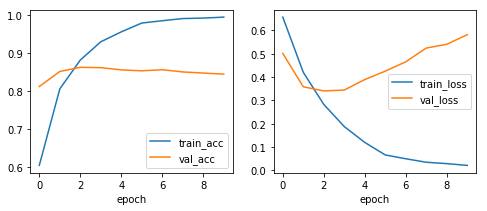

In [11]:
# Exercise 5.6. Investigate the training process

import matplotlib.pyplot as plt
import pandas as pd
# plot a figure with size 20x8

# the fitting history is saved as dictionary
# covert the dictionary to dataframe
df=pd.DataFrame.from_dict(training.history)
df.columns=["train_acc", "train_loss", \
            "val_acc", "val_loss"]
df.index.name='epoch'
print(df)

# plot training history
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3));

df[["train_acc", "val_acc"]].plot(ax=axes[0]);
df[["train_loss", "val_loss"]].plot(ax=axes[1]);
plt.show();

Observations from training history:
- As training goes on, training accuracy/loss gets always better
- Testing accuracy/loss gets better at the beginning, the gets worse
- This indicates that model is **overfitted** and cannot be generalized after certain point
- Thus, we should **stop training the model when testing accuracy/loss gets worse**. 
- This analysis can be used to determine hyperparameter **NUM_EPOCHES**
- Fortunately, this can be done automatically by **"Early Stopping"**

In [12]:
# Exercise 5.6: Use early stopping to find the best model

from keras.callbacks import EarlyStopping, ModelCheckpoint

# the file path to save best model
BEST_MODEL_FILEPATH="best_model"

# define early stopping based on validation loss
# if validation loss is not improved in 
# an iteration compared with the previous one, 
# stop training (i.e. patience=0). 
# mode='min' indicate the loss needs to decrease 
earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=2, mode='min')


# define checkpoint to save best model
# which has max. validation acc
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, monitor='val_acc', verbose=2, save_best_only=True, mode='max')



# compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



# fit the model with earlystopping and checkpoint
# as callbacks (functions that are executed as soon as 
# an asynchronous thread is completed)
model.fit(X_train, y_train, \
          batch_size=BATCH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping, checkpoint],
          validation_data=[X_test, y_test],\
          verbose=2)

Train on 5600 samples, validate on 2401 samples
Epoch 1/10
Epoch 00000: val_acc improved from -inf to 0.84923, saving model to best_model
30s - loss: 0.0234 - acc: 0.9916 - val_loss: 0.6665 - val_acc: 0.8492
Epoch 2/10
Epoch 00001: val_acc did not improve
29s - loss: 0.0135 - acc: 0.9950 - val_loss: 0.7354 - val_acc: 0.8471
Epoch 00001: early stopping


In [13]:
# Exercise 5.7: Load the best model

# load the model using the save file
model.load_weights("best_model")

# predict
pred=model.predict(X_test)
print(pred[0:5])
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[[9.9892455e-01]
 [9.8414892e-01]
 [9.9999988e-01]
 [3.9199274e-03]
 [1.3991306e-06]]
acc: 84.92%


In [19]:
# Exercise 5.8: Put Everything as a function

from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
              
def cnn_model(FILTER_SIZES, \
              # filter sizes as a list
              MAX_NB_WORDS, \
              # total number of words
              MAX_DOC_LEN, \
              # max words in a doc
              EMBEDDING_DIM=200, \
              # word vector dimension
              NUM_FILTERS=64, \
              # number of filters for all size
              DROP_OUT=0.5, \
              # dropout rate
              NUM_OUTPUT_UNITS=1, \
              # number of output units
              NUM_DENSE_UNITS=100,\
              # number of units in dense layer
              PRETRAINED_WORD_VECTOR=None,\
              # Whether to use pretrained word vectors
              LAM=0.0):            
              # regularization coefficient
    
    main_input = Input(shape=(MAX_DOC_LEN,), \
                       dtype='int32', name='main_input')
    
    if PRETRAINED_WORD_VECTOR is not None:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        weights=[PRETRAINED_WORD_VECTOR],\
                        trainable=False,\
                        name='embedding')(main_input)
    else:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        name='embedding')(main_input)
    # add convolution-pooling-flat block
    conv_blocks = []
    for f in FILTER_SIZES:
        conv = Conv1D(filters=NUM_FILTERS, kernel_size=f, \
                      activation='relu', name='conv_'+str(f))(embed_1)
        conv = MaxPooling1D(MAX_DOC_LEN-f+1, name='max_'+str(f))(conv)
        conv = Flatten(name='flat_'+str(f))(conv)
        conv_blocks.append(conv)
    
    if len(conv_blocks)>1:
        z=Concatenate(name='concate')(conv_blocks)
    else:
        z=conv_blocks[0]
        
    drop=Dropout(rate=DROP_OUT, name='dropout')(z)

    dense = Dense(NUM_DENSE_UNITS, activation='relu',\
                    kernel_regularizer=l2(LAM),name='dense')(drop)
    preds = Dense(NUM_OUTPUT_UNITS, activation='sigmoid', name='output')(dense)
    model = Model(inputs=main_input, outputs=preds)
    
    model.compile(loss="binary_crossentropy", \
              optimizer="adam", metrics=["accuracy"]) 
    
    return model

### 5.7. Use CNN for multi-label classification
- In multi-label classification, a document can be classified into multiple classes
- We can use **multiple ouput units**, each responsible for predicating one class
- For multi-label classification ($K$ classes), do the following:
    1. Represent the labels as **indication matrix**
        - e.g. three classes ['econ','biz','tech'] in total, 
        - sample 1: 'eco' only -> [1, 0, 0]
        - sample 2: ['eco','biz'] ->[1, 1, 0]
    2. Accordingly, **set output layer to have K output units**
        - each responsible for one class
        - each unit gives the probabability of one class


- Example: Yahoo News Ranked Multilabel Learning dataset (http://research.yahoo.com)
  - A subset is selected
  - 4 classes, 6426 samples

In [15]:
# Exercise 5.7.1: Load and process the data

import json
from sklearn.preprocessing import MultiLabelBinarizer
from numpy.random import shuffle

# load the data
data=json.load(open("ydata.json",'rb'))
#data=json.load(open("ydata.json",'r'))


# shuffle the data
shuffle(data)


# split into text and label
text,labels=zip(*data)
text=list(text)
labels=list(labels)
text[1]
labels[1]

'columbia laboratories stockholders approve sale of progesterone assets to watson pharmaceuticals yahoo finance what are streaming quotes market name u s id us market tz edt tzoffset open close flags streamer server http streamerapi finance yahoo com arrowaschangesign false throttleinterval skip navigation home investing market overview market stats stocks mutual funds etfs bonds options industries currencies education news opinion markets investing ideas expert advice special editions company finances providers videonew personal finance banking budgeting career work college education family home insurance loans real estate retirement taxes lifelong investing my portfolios sign in to access my portfolios free trial of real time quotes tech ticker search for share prices search for share prices finance searchthu aug edt u s markets close in mins columbia laboratories stockholders approve sale of progesterone assets to watson pharmaceuticals companies columbia laboratories inc related s 

['money', 'investment-&-company-information', 'investment']

In [16]:
# Exercise 5.7.2: create indicator matrix for labels

mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(labels)
# check size of indicator matrix
Y.shape
# check classes
mlb.classes_
# check # of samples in each class
np.sum(Y, axis=0)

(6426, 4)

array(['crime-&-justice', 'investment',
       'investment-&-company-information', 'money'], dtype=object)

array([2515, 3607, 3468, 3202])

In [17]:
# Exercise 5.7.3: Load and process the data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import numpy as np

# get a Keras tokenizer

MAX_NB_WORDS=8000
# documents are quite long in the dataset
MAX_DOC_LEN=1000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)
voc=tokenizer.word_index
# convert each document to a list of word index as a sequence
sequences = tokenizer.texts_to_sequences(text)
# get the mapping between words to word index

# pad all sequences into the same length (the longest)
padded_sequences = pad_sequences(sequences, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', truncating='post')

#print(padded_sequences[0])


In [23]:
# Exercise 5.7.4: Fit the model using the function

from sklearn.model_selection import train_test_split

EMBEDDING_DIM=100
FILTER_SIZES=[2,3,4]

# set the number of output units
# as the number of classes
output_units_num=len(mlb.classes_)
num_filters=64

# set the dense units
dense_units_num= num_filters*len(FILTER_SIZES)


BTACH_SIZE = 64
NUM_EPOCHES = 20

# split dataset into train (70%) and test sets (30%)
X_train, X_test, Y_train, Y_test = train_test_split(\
                padded_sequences, Y, test_size=0.2, random_state=0)


model=cnn_model(FILTER_SIZES, MAX_NB_WORDS, MAX_DOC_LEN, NUM_FILTERS=num_filters,\
                NUM_OUTPUT_UNITS=output_units_num, \
                NUM_DENSE_UNITS=dense_units_num)

earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=2, mode='min')
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, monitor='val_loss', \
                             verbose=2, save_best_only=True, mode='min')
    
training=model.fit(X_train, Y_train, \
          batch_size=BTACH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping, checkpoint],\
          validation_data=[X_test, Y_test], verbose=2)

Train on 5140 samples, validate on 1286 samples
Epoch 1/20
Epoch 00000: val_loss improved from inf to 0.22730, saving model to best_model
129s - loss: 0.4585 - acc: 0.7852 - val_loss: 0.2273 - val_acc: 0.9102
Epoch 2/20
Epoch 00001: val_loss improved from 0.22730 to 0.18670, saving model to best_model
128s - loss: 0.2274 - acc: 0.9190 - val_loss: 0.1867 - val_acc: 0.9358
Epoch 3/20
Epoch 00002: val_loss improved from 0.18670 to 0.17672, saving model to best_model
323s - loss: 0.1724 - acc: 0.9391 - val_loss: 0.1767 - val_acc: 0.9393
Epoch 4/20
Epoch 00003: val_loss improved from 0.17672 to 0.17384, saving model to best_model
137s - loss: 0.1381 - acc: 0.9524 - val_loss: 0.1738 - val_acc: 0.9425
Epoch 5/20
Epoch 00004: val_loss did not improve
139s - loss: 0.1189 - acc: 0.9578 - val_loss: 0.1856 - val_acc: 0.9388
Epoch 00004: early stopping


In [24]:
# Exercise 5.7.5: predicate using the best model
# calculate performance

# load the best model
model.load_weights("best_model")

pred=model.predict(X_test)
pred[0:5]

array([[9.9998558e-01, 3.8914490e-04, 9.1924172e-05, 2.1627230e-04],
       [7.6253116e-03, 8.7126344e-01, 9.4516116e-01, 8.9557737e-01],
       [7.8014191e-04, 9.3820077e-01, 9.7588003e-01, 9.2896700e-01],
       [1.3660673e-04, 9.6760023e-01, 9.9078321e-01, 9.6447533e-01],
       [9.9924588e-01, 6.9322013e-03, 2.5319203e-03, 4.4500292e-03]],
      dtype=float32)

In [26]:
# Exercise 5.7.6: Generate performance report

from sklearn.metrics import classification_report

pred = np.where(pred>0.5,1,0)

print(classification_report(Y_test,pred,target_names=mlb.classes_))

                                  precision    recall  f1-score   support

                 crime-&-justice       0.99      0.97      0.98       487
                      investment       0.91      0.99      0.95       737
investment-&-company-information       0.94      0.97      0.95       712
                           money       0.85      0.96      0.90       651

                     avg / total       0.92      0.97      0.95      2587



### 5.8.  Use Pretrained Word Vectors
- If **the size of labeled samples is small, it's better use pretrained word vectors** 
    - e.g. google or facebook pretrained word vectors
    - or you can train word vectors using relevant context data using gensim
- Procedure:
    1. Obtain/train pretrained word vectors (see Section 4.1 and Exercise 4.1.1)
    2. Look for the word vector for each word in the vocabulary and create **embedding matrix** where each row represents one word vector
    3. Set embedding layer with the embedding matrix and set it not trainable.
- With well-trained word vectors, often a small sample set can also achieve good performance

In [22]:
# Exercise 5.8.1: Load full yahoo news dataset
# to train the word vector
# note this data can be unlabeled. only text is used
import json

data=json.load(open("ydata.json",'r'))
text,labels=zip(*data)
text=list(text)

sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in text]

In [27]:
# Exercise 5.8.2: Train word vector using 
# the large data set

from gensim.models import word2vec
import logging
import pandas as pd

# print out tracking information
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
EMBEDDING_DIM=200
# min_count: words with total frequency lower than this are ignored
# size: the dimension of word vector
# window: is the maximum distance 
#         between the current and predicted word 
#         within a sentence (i.e. the length of ngrams)
# workers: # of parallel threads in training
# for other parameters, check https://radimrehurek.com/gensim/models/word2vec.html
wv_model = word2vec.Word2Vec(sentences, min_count=5, \
                             size=EMBEDDING_DIM, window=5, workers=4 )

In [28]:
# get word vector for all words in the vocabulary
# see reference at https://github.com/fchollet/keras/blob/master/examples/pretrained_word_embeddings.py

EMBEDDING_DIM=200
MAX_NB_WORDS=8000

# tokenizer.word_index provides the mapping 
# between a word and word index for all words
NUM_WORDS = min(MAX_NB_WORDS, len(tokenizer.word_index))

# "+1" is for padding symbol
embedding_matrix = np.zeros((NUM_WORDS+1, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
    # if word_index is above the max number of words, ignore it
    if i >= NUM_WORDS:
        continue
    if word in wv_model.wv:
        embedding_matrix[i]=wv_model.wv[word]

In [29]:
# Exercise 5.8.3: Fit model using pretrained word vectors

from sklearn.model_selection import train_test_split

EMBEDDING_DIM=200
FILTER_SIZES=[2,3,4]

# set the number of output units
# as the number of classes
output_units_num=len(mlb.classes_)

#Number of filters for each size
num_filters=64

# set the dense units
dense_units_num= num_filters*len(FILTER_SIZES)

BTACH_SIZE = 32
NUM_EPOCHES = 100

# With well trained word vectors, sample size can be reduced
# Assume we only have 500 labeled data
# split dataset into train (70%) and test sets (20%)

X_train, X_test, Y_train, Y_test = train_test_split(\
                padded_sequences[0:500], Y[0:500], \
                test_size=0.2, random_state=0, shuffle=True)

# create the model with embedding matrix
model=cnn_model(FILTER_SIZES, MAX_NB_WORDS, \
                MAX_DOC_LEN, \
                NUM_FILTERS=num_filters,\
                NUM_OUTPUT_UNITS=output_units_num, \
                NUM_DENSE_UNITS=dense_units_num,\
                PRETRAINED_WORD_VECTOR=embedding_matrix)

earlyStopping=EarlyStopping(monitor='val_loss', patience=1, verbose=2, mode='min')
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, monitor='val_loss', \
                             verbose=2, save_best_only=True, mode='min')
    
training=model.fit(X_train, Y_train, \
          batch_size=BTACH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping, checkpoint],\
          validation_data=[X_test, Y_test], verbose=2)

Train on 400 samples, validate on 100 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.47023, saving model to best_model
8s - loss: 1.1196 - acc: 0.5731 - val_loss: 0.4702 - val_acc: 0.7900
Epoch 2/100
Epoch 00001: val_loss improved from 0.47023 to 0.35773, saving model to best_model
7s - loss: 0.6822 - acc: 0.7112 - val_loss: 0.3577 - val_acc: 0.8450
Epoch 3/100
Epoch 00002: val_loss did not improve
10s - loss: 0.5356 - acc: 0.7994 - val_loss: 0.3872 - val_acc: 0.8600
Epoch 4/100
Epoch 00003: val_loss improved from 0.35773 to 0.33921, saving model to best_model
9s - loss: 0.4025 - acc: 0.8425 - val_loss: 0.3392 - val_acc: 0.8775
Epoch 5/100
Epoch 00004: val_loss did not improve
11s - loss: 0.3584 - acc: 0.8675 - val_loss: 0.3766 - val_acc: 0.8775
Epoch 6/100
Epoch 00005: val_loss improved from 0.33921 to 0.33093, saving model to best_model
8s - loss: 0.3095 - acc: 0.8856 - val_loss: 0.3309 - val_acc: 0.8825
Epoch 7/100
Epoch 00006: val_loss improved from 0.33093 to 0.3

In [30]:
# Exercise 5.8.4: check model configuration
# Note that parameters from embedding layer
# is not trainable

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 1000)          0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 1000, 200)     1600200     main_input[0][0]                 
____________________________________________________________________________________________________
conv_2 (Conv1D)                  (None, 999, 64)       25664       embedding[0][0]                  
____________________________________________________________________________________________________
conv_3 (Conv1D)                  (None, 998, 64)       38464       embedding[0][0]                  
___________________________________________________________________________________________

In [31]:
# Exercise 5.8.5: Performance evaluation
# Let's use samples[500:1000]
# as an evaluation set

from sklearn.metrics import classification_report
pred=model.predict(padded_sequences[500:1000])

Y_pred=np.copy(pred)
Y_pred=np.where(Y_pred>0.5,1,0)

Y_pred[0:10]
Y[500:510]

print(classification_report(Y[500:1000], Y_pred, target_names=mlb.classes_))

array([[0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

                                  precision    recall  f1-score   support

                 crime-&-justice       0.99      0.91      0.95       210
                      investment       0.88      0.96      0.91       267
investment-&-company-information       0.86      0.97      0.91       262
                           money       0.79      0.95      0.86       241

                     avg / total       0.88      0.95      0.91       980



Observations:
- Note that we only trained the model with **500 samples**
- The performance is only slightly lower, compared with the one trained with 6000 samples
- This shows that pre-trained word vectors can effectively improve the classification performance in the case of small labeled dataset

### 5.9. How to select hyperparameters?
- Fitting a neural network is a very empirical process
- See Section 3 of "Practical Recommendations for Gradient-Based Training of Deep Architectures" (https://arxiv.org/abs/1206.5533) for detailed discussion
- The following is some useful techniques to set 
  - MAX_NB_WORDS: max number words to be included in word embedding
    - Based on word frequency histogram to include words that appear at least $n$ times
  - MAX_DOC_LEN: max length of documents
    - Based on document length frequency histogram to include complete sentences as many as possible


              freq
jetblue        179
expands         93
service       2404
to           83098
connecticut    105
   word_freq  count   percent    cumsum
0          1  25112  0.378238  0.378238
1          2   9216  0.138812  0.517050
2          3   4842  0.072930  0.589981
3          4   3254  0.049012  0.638993
4          5   2367  0.035652  0.674645


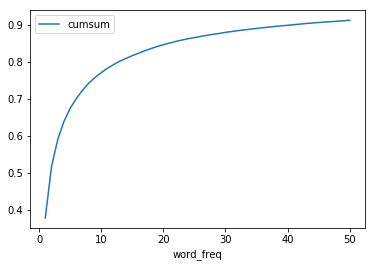

In [32]:
# Exercise 5.9.1 Set MAX_NB_WORDS to 
# include words that appear at least K times

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# get count of each word
df=pd.DataFrame.from_dict(tokenizer.word_counts, orient="index")
df.columns=['freq']
print(df.head())

# get histogram of word count
df=df['freq'].value_counts().reset_index()
df.columns=['word_freq','count']

# sort by word_freq
df=df.sort_values(by='word_freq')

# convert absolute counts to precentage
df['percent']=df['count']/len(tokenizer.word_counts)
# get cumulative percentage
df['cumsum']=df['percent'].cumsum()

print(df.head())

df.iloc[0:50].plot(x='word_freq', y='cumsum');

plt.show();

# if set min count for word to 10, 
# what % of words can be included?
# how many words will be included?
# This is the parameter MAX_NB_WORDS
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

In [ ]:
# Exercise 5.9.2 Set MAX_DOC_LEN to 
# include complete sentences as many as possible

# create a series based on the length of all sentences
sen_len=pd.Series([len(item) for item in sequences])

# create histogram of sentence length
# the "index" is the sentence length
# "counts" is the count of sentences at a length
df=sen_len.value_counts().reset_index().sort_values(by='index')
df.columns=['sent_length','counts']

# sort by sentence length
# get percentage and cumulative percentage

df['percent']=df['counts']/len(sen_len)
df['cumsum']=df['percent'].cumsum()
print(df.head(3))

# From the plot, 90% sentences have length<500
# so it makes sense to set MAX_DOC_LEN=4~500 
df.plot(x="sent_length", y='cumsum');
plt.show();

# what will be the minimum sentence length
# such that 99% of sentences will not be truncated?